<a href="https://www.kaggle.com/code/dheerajanumula/eda-project-2-video-game-sales?scriptVersionId=255381367" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory Data Analysis of Video Game Sales Dataset

-> To begin the analysis, we import the essential Python libraries:

**Pandas** for data manipulation and analysis.

**Numpy** for numerical operations.

**matplotlib.pyplot** for visualizing the data.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

-> We load the **Video Games Sales** dataset using pandas.read_csv(), which reads the data from the provided file path and stores it in a DataFrame named df

In [2]:
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
df=pd.DataFrame(df)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


The Video Game Sales dataset contains 16,598 entries and 11 columns.

Each row represents a video game with details such as name, platform, release year, genre, publisher, and sales figures across different regions (NA, EU, JP, Others) and globally.



-> We print the number of rows and columns in the dataset using **df.shape** to understand the dataset's overall size.

In [3]:
print("Shape of dataset (rows, columns):", df.shape)

Shape of dataset (rows, columns): (16598, 11)


-> df.head() to display the first five rows of the dataset and get a quick overview of its structure and contents.

In [4]:
 df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Cleaning Data

-> Checking missing values per column using isnull and sum functions

In [5]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


We observed missing values in the Year and Publisher columns.

The Year column had 271 missing values, and the Publisher column had 58 missing values.

We dropped all rows where the Year was missing, as it is important for time-based analysis.

For the Publisher column, we replaced the missing values with 'Unknown'.

After cleaning, we checked for any remaining missing values.

In [6]:
df.dropna(subset=['Year'],inplace=True)
df['Publisher'] = df['Publisher'].fillna('Unknown')
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


Changing Data type of year to Integer

In [7]:
df['Year'] = df['Year'].astype(int)
df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# EDA

In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**Notes**: The dataset has 16,327 records with no missing values in numeric columns.

The average release year is 2006, ranging from 1980 to 2020.

North America (NA) has the highest average sales compared to other regions.

Global sales range from 0.01M to 82.74M, with a highly skewed distribution (mean = 0.54, max = 82.74).

Most games have low sales figures, with a few blockbuster titles pushing the maximum values much higher.

The Year column shows data from 1980 to 2020, with most releases centered around 2003–2010.

**What are the average Global Sales**

In [9]:
avg_global_sales = df['Global_Sales'].mean()
print("\nAverage Global Sales:", round(avg_global_sales, 2), "million units")


Average Global Sales: 0.54 million units


**which platform has most games**

In [10]:
platform_counts = df['Platform'].value_counts()
most_common_platform = platform_counts.idxmax()
print("\nPlatform with most games:", most_common_platform, "with", platform_counts.max(), "games")


Platform with most games: DS with 2133 games


**which year has most releases**

In [11]:
year_counts = df['Year'].value_counts()
most_common_year = year_counts.idxmax()
print("\nYear with most releases:", most_common_year, "with", year_counts.max(), "games")


Year with most releases: 2009 with 1431 games


**What is the most common genre?**

In [12]:

most_common_genre = df['Genre'].value_counts().idxmax()
print("Most common genre:", most_common_genre)

Most common genre: Action


**How many unique platforms are there**

In [13]:
platforms = df['Platform'].unique()
print("Number of unique platforms:", len(platforms))
print("Platforms:", platforms)

Number of unique platforms: 31
Platforms: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


**Which game has maximum sales**

In [14]:
max_na = df[df['NA_Sales'] == df['NA_Sales'].max()]
print(max_na[['Name', 'NA_Sales']])

         Name  NA_Sales
0  Wii Sports     41.49


## Visualizations

**Distribution of Global Game Sales**

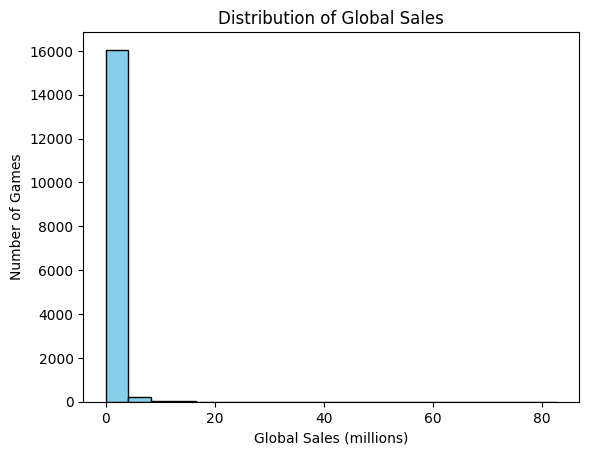

In [15]:
plt.hist(df['Global_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Number of Games')
plt.show()

**Notes**:
Most games have low global sales under 2 million units.

The data is right-skewed with a few high-selling outliers.

This histogram shows the number of games across sales ranges.


**Top 10 Platforms by Number of Games**

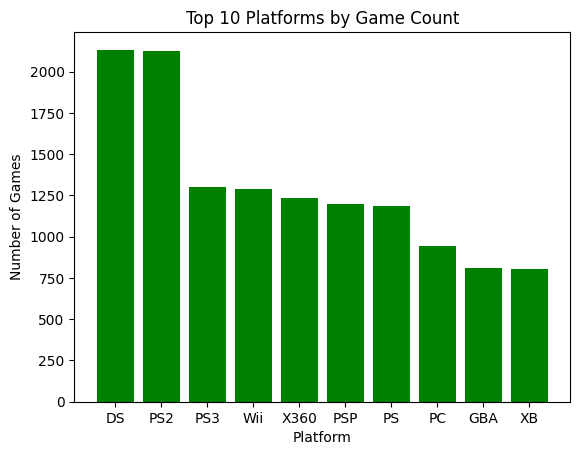

In [16]:
platform_counts = df['Platform'].value_counts().head(10)
plt.bar(platform_counts.index, platform_counts.values, color='green')
plt.title('Top 10 Platforms by Game Count')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.show()

**Notes**: Top 10 Platforms are shown in Bar Chart, DS and PS2 have highest number of games around 2k games are there.

**Top 10 Best-Selling Video Games Globally**

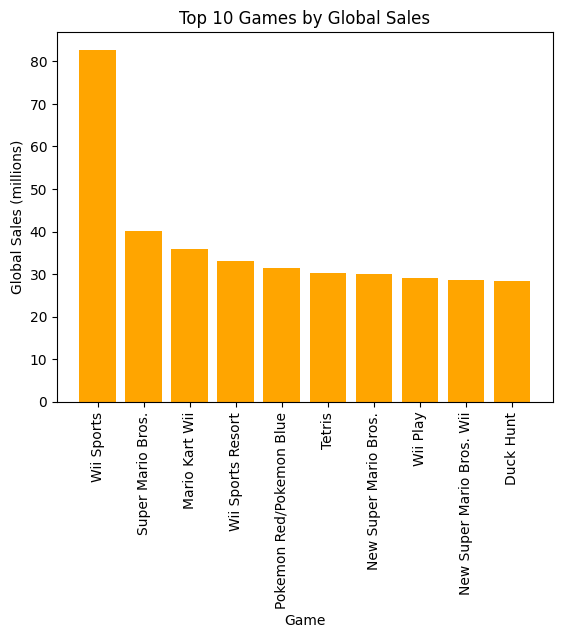

In [17]:
top10 = df.sort_values(by='Global_Sales', ascending=False).head(10)
plt.bar(top10['Name'], top10['Global_Sales'], color='orange')
plt.title('Top 10 Games by Global Sales')
plt.xlabel('Game')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=90)
plt.show()

**Notes**: Best Selling games are shown in the chart. Wii sports is the best selling game.

**Proportion of Video Game Sales by Region**

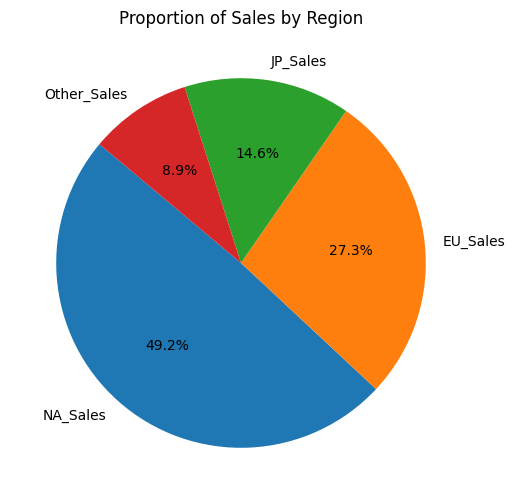

In [18]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_totals = [df[r].sum() for r in regions]

plt.figure(figsize=(6, 6))
plt.pie(region_totals, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sales by Region')
plt.show()

**Notes**: 
1. North America has the highest share of global video game sales.
2. EU and Japan follow, with Other regions contributing the least.
3. This pie chart shows the sales distribution by region.


**Most Common Game Genres (Horizontal Bar Chart)**

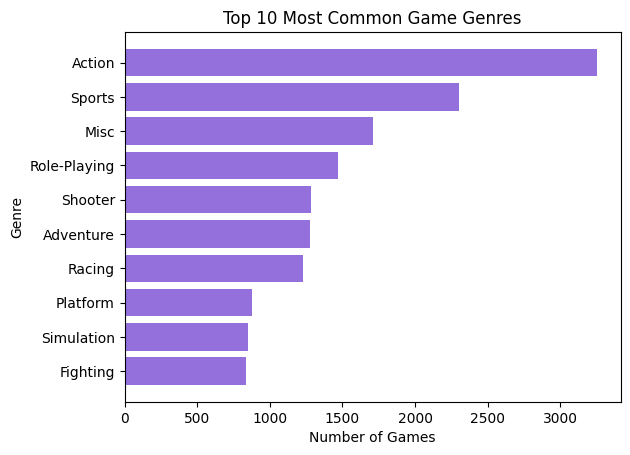

In [19]:
genre_counts = df['Genre'].value_counts().head(10)

plt.barh(genre_counts.index, genre_counts.values, color='mediumpurple')
plt.title('Top 10 Most Common Game Genres')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Highest bar at top
plt.show()

**Notes**:Bar chart shows action is the most common game genre followed by sports 


**Most Active Game Publishers (Pie Chart)**

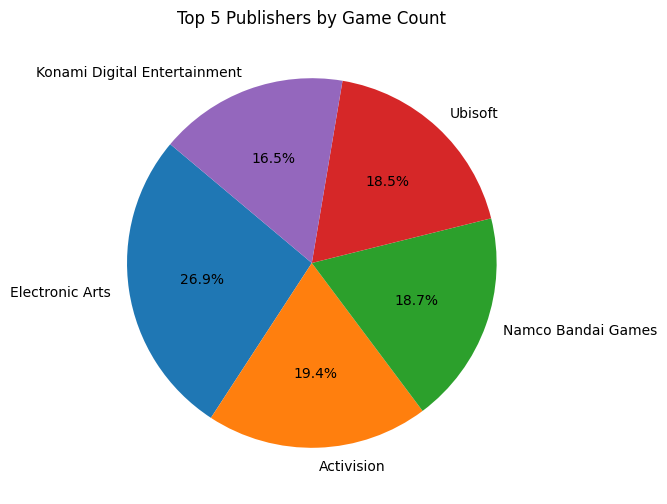

In [20]:
publisher_counts = df['Publisher'].value_counts().head(5)

plt.figure(figsize=(6,6))
plt.pie(publisher_counts.values, labels=publisher_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Publishers by Game Count')
plt.show()


**Notes**:Pie chart shows Electronic Arts is famous publisher, all other publishers in top 5 are similarly famous.


**Global Sales Comparison: Genre vs Publisher vs Platform (Top 5)**

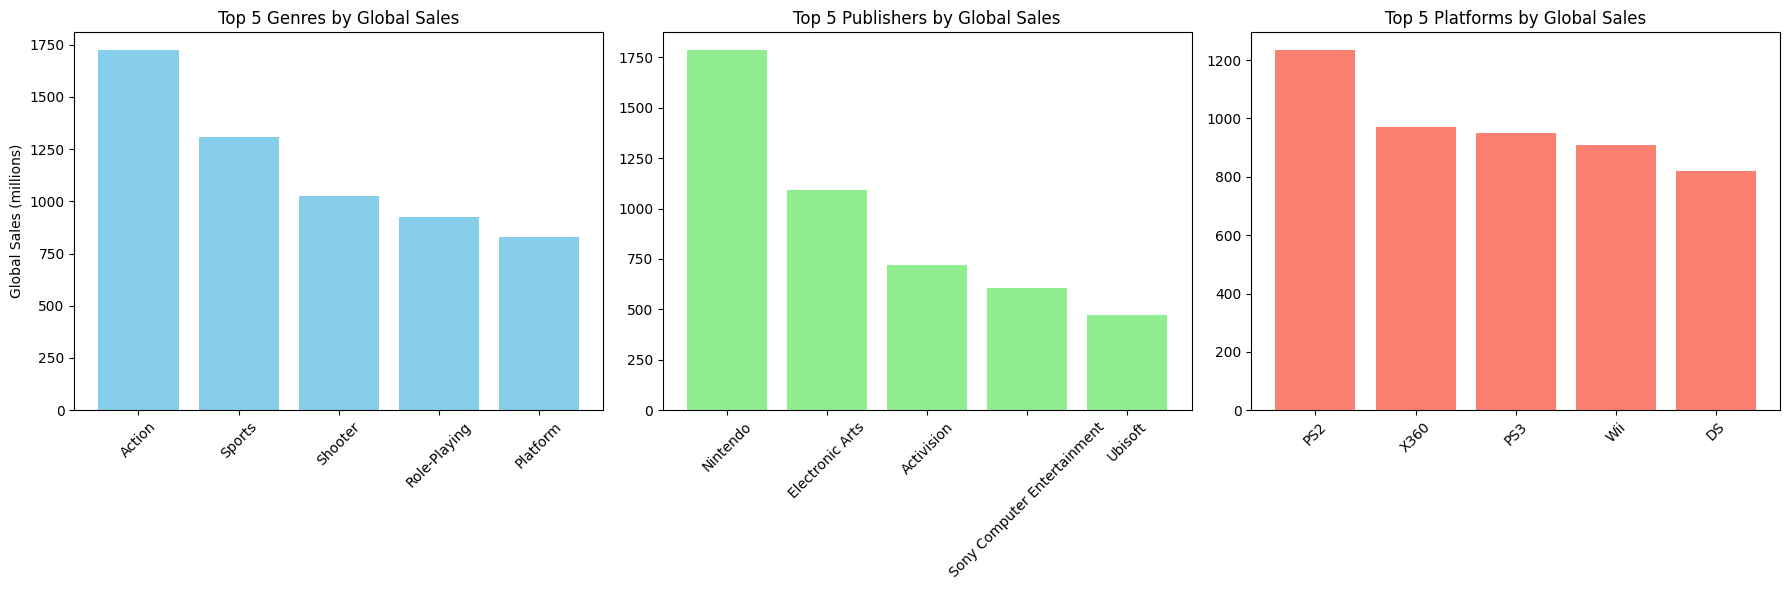

In [21]:
# Aggregate global sales by category
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)

# Prepare plot
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Genre
ax[0].bar(genre_sales.index, genre_sales.values, color='skyblue')
ax[0].set_title('Top 5 Genres by Global Sales')
ax[0].set_ylabel('Global Sales (millions)')
ax[0].tick_params(axis='x', rotation=45)

# Publisher
ax[1].bar(publisher_sales.index, publisher_sales.values, color='lightgreen')
ax[1].set_title('Top 5 Publishers by Global Sales')
ax[1].tick_params(axis='x', rotation=45)

# Platform
ax[2].bar(platform_sales.index, platform_sales.values, color='salmon')
ax[2].set_title('Top 5 Platforms by Global Sales')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Notes**:Action is the most popular genre, and Nintendo leads among publishers.
PS2 dominates platform sales, followed by Xbox360 and PS3.
These bar charts highlight the top 5 in each category by global sales.

# Summary
* The dataset includes over 16,500 games, with data on name, platform, year, genre, publisher, and sales across North America, Europe, Japan, and other regions.
* Action is the most common genre, followed by Sports and Misc.
* The top-selling games globally include classics like Wii Sports.
* North America accounts for the largest share of global sales, followed by Europe and Japan.
* Nintendo, Electronic Arts, and Activision are the top publishers in terms of total global sales.
* Popular platforms like PS2, X360, and Wii dominate the charts, showing strong user bases during their peak years.

# Conclusion: 
North America (NA) leads in global video game sales because:

It has a large and mature gaming market, especially in countries like the United States and Canada, where gaming has been popular for decades.

High purchasing power and strong console sales (e.g., Xbox, PlayStation, Nintendo) contribute to higher sales volumes.

Many top-selling games are developed or heavily marketed in North America, boosting regional interest and sales.